# Setup

In [5]:
using RigidBodyDynamics
using StaticArrays
using Plots
using MeshCatMechanisms

INFO: Recompiling stale cache file /home/rdeits/.julia/lib/v0.6/MeshCatMechanisms.ji for module MeshCatMechanisms.


# Creating, simulating, and visualizing a double pendulum `Mechanism`

We're going to create a simple `Mechanism` that represents a [double pendulum](https://en.wikipedia.org/wiki/Double_pendulum).
One way of creating a `Mechanism` is by parsing a [URDF](http://wiki.ros.org/urdf) file:

In [6]:
urdf = "data/doublependulum.urdf"
doublependulum = parse_urdf(Float64, urdf)

Spanning tree:
Vertex: world (root)
  Vertex: base_link, Edge: base_link_to_world
    Vertex: upper_link, Edge: shoulder
      Vertex: lower_link, Edge: elbow
No non-tree joints.

A `Mechanism` stores the joint/rigid body layout, but no state information. State information is separated out into a `MechanismState` object:

In [7]:
const state = MechanismState{Float64}(doublependulum)

MechanismState{Float64, Float64, Float64, …}(…)

Next, we'll visualize the double pendulum using MeshCat (a web-enabled 3D viewer): 

In [8]:
vis = MechanismVisualizer(doublependulum, URDFVisuals(urdf));

# To open the visualizer in a new tab, just do: 
# 
# open(vis)

MeshCat even allows us to embed a visulizer inside the jupyter notebook: 

In [9]:
MeshCat.IJuliaCell(vis)

WebIO.Scope("scope-5e3a2644-4fc3-4a16-b2e0-a171e82d1ca2", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict{String,Any}(Pair{String,Any}("height", "100%"),Pair{String,Any}("scrolling", "no"),Pair{String,Any}("src", "javascript:void(0)"),Pair{String,Any}("frameborder", 0))),Pair{Symbol,Any}(:id, "ifr"),Pair{Symbol,Any}(:style, Dict("width"=>"100%","flexGrow"=>"1"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:style, Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden"))), 1), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(), Set{String}(), nothing, Any[], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Determine if we're running on a Jupyter hosting service\n    // that requires a base URL when retrieving assets\n    var curMatch =\n        window.location.href\n        .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n    curMatch = curMatch ||\n        window.location.href\n        .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n    if (curMatch) {\n        var base = doc.createElement(\"base\");\n        base.setAttribute(\"href\", curMatch[1] + '/');\n        doc.head.appendChild(base);\n    }\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"pkg/WebIO/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;pkg/MeshCat/meshcat/dist/main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-f8c524dd-6896-4f8d-888d-e77169abc92a&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-f8c524dd-6896-4f8d-888d-e77169abc92a&quot;,&quot;id&quot;:&quot;ob_05&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); return window.document.body.style.margin=&quot;0&quot;})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_04&quot;,&quot;value&quot;:[131,166,109,97,116,114,105,120,199,64,23,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,205,204,204,61,0,0,128,191,0,0,128,63,164,116,121,112,101,173,115,101,116,95,116,114,97,110,115,102,111,114,109,164,112,97,116,104,218,0,46,47,109,101,115,104,99,97,116,47,119,111,114,108,100,47,98,97,115,101,95,108,105,110,107,47,117,112,112,101,114,95,108,105,110,107,47,108,111,119,101,114,95,108,105,110,107]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_06&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_05&quot;,&quot;va

Let's first set the configurations and velocities of the joints:

In [10]:
set_configuration!(state, randn(num_positions(state)))
set_configuration!(vis, configuration(state))

Basic simulation is easy:

In [11]:
ts, qs, vs = simulate(state, 5., Δt = 1e-3);

After which we can animate the results:

In [12]:
MeshCatMechanisms.animate(vis, ts, qs)

Or plot them using e.g. Plots.jl:

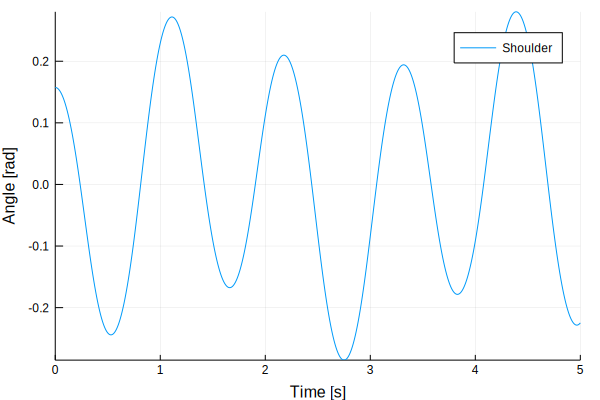

In [13]:
plot(ts, collect(q[1] for q in qs), xlabel = "Time [s]", ylabel = "Angle [rad]", lab = "Shoulder")

# The basic design of  `Mechanism` and `MechanismState`

A `Mechanism` is an interconnection of rigid bodies and joints, without any state information:

In [ ]:
collect(bodies(doublependulum))

In [ ]:
collect(joints(doublependulum))

A `MechanismState` has all the state information, e.g. the configurations and velocities of all the joints:

In [ ]:
configuration(state)

In [ ]:
velocity(state)

It also has various cached computation results meant to reduce double work while computing various kinematic/dynamic quantities.

# Kinematics

Let's unpack the list of joints into separate variables:

In [ ]:
fixedjoint, shoulder, elbow = (joints(doublependulum)...)

Many objects have frame annotations in the form of `CartesianFrame3D` objects:

In [ ]:
frame_after(shoulder)

In [ ]:
frame_before(shoulder)

Here's how you create a point in the frame after the elbow joint:

In [ ]:
p = Point3D(frame_after(elbow), SVector(1., 2., 3.))

Transform it to world frame in the current state:

In [ ]:
p = transform(state, p, root_frame(doublependulum))

Now suppose we have a displacement we defined in `elbow.frameAfter`:

In [ ]:
displacement = FreeVector3D(frame_after(elbow), SVector(2., 3., 4.))

and we want to add it to `p`:

In [ ]:
try
    p + displacement
catch err
    println("failed!")
    err
end

Excercise: how to fix?

You can also ask for the homogeneous transform to world:

In [ ]:
transform_to_root(state, frame_after(elbow))

Or a relative transform:

In [ ]:
relative_transform(state, frame_after(elbow), frame_after(shoulder))

Here's the center of mass of the double pendulum in the given state:

In [ ]:
center_of_mass(state)

Motion between bodies is represented using `Twist`s:

In [ ]:
twist = relative_twist(state, frame_after(elbow), frame_before(shoulder))

In [ ]:
transform(state, twist, frame_after(elbow))

# Dynamics

A `MechanismState` can also be used to compute quantities related to the dynamics of the `Mechanism`. Here we compute the mass matrix:

In [ ]:
mass_matrix(state)

Here's the documentation for `mass_matrix` by the way:

In [ ]:
?mass_matrix

Note that there is also a zero-allocation version, `mass_matrix!` (the `!` at the end of a method is a Julia convention signifying that the function is 'in-place', i.e. modifies its input data).

We can do inverse dynamics as follows (note again that there is a non-allocating version of this method as well):

In [ ]:
v̇ = [2.; 3.] # the joint acceleration vector, i.e., the time derivative of the joint velocity vector v
inverse_dynamics(state, v̇)

For forward dynamics, one first creates a `DynamicsResult` object, which preallocates a bunch of stuff:

In [ ]:
result = DynamicsResult{Float64}(doublependulum);

In [ ]:
dynamics!(result, state)

In [ ]:
result.v̇

# Symbolic dynamics

## Setup

In [ ]:
# Make SymPy use version of Python downloaded through Julia's package system instead of system Python
ENV["PYTHON"]=""
Pkg.build("SymPy")

In [ ]:
using SymPy

In [ ]:
doublependulumsym = parse_urdf(Sym, urdf)
remove_fixed_tree_joints!(doublependulumsym);

## Create symbolic parameters
* Masses: $m_1, m_2$
* Mass moments of inertia (about center of mass): $I_1, I_2$
* Link lengths: $l_1, l_2$
* Center of mass locations (w.r.t. preceding joint axis): $c_1, c_2$
* Gravitational acceleration: $g$

In [ ]:
inertias = @syms m_1 m_2 I_1 I_2 positive = true
lengths = @syms l_1 l_2 c_1 c_2 real = true
gravitationalAcceleration = @syms g real = true
[inertias..., lengths..., gravitationalAcceleration...]'

Unpack bodies and joints:

In [ ]:
world, upperlink, lowerlink = (bodies(doublependulumsym)...)
shoulder, elbow = (joints(doublependulumsym)...);

Set symbolic parameters:

In [ ]:
axis = joint_type(shoulder).axis
spatial_inertia!(upperlink, SpatialInertia(frame_after(shoulder), I_1 * axis * axis.', SVector(0, 0, -c_1), m_1))
spatial_inertia!(lowerlink, SpatialInertia(frame_after(elbow), I_2 * axis * axis.', SVector(0, 0, -c_2), m_2))
add_frame!(upperlink, Transform3D(frame_before(elbow), frame_after(shoulder), SVector(0, 0, l_1)));

Create a symbolic `MechanismState`:

In [ ]:
statesym = MechanismState{Sym}(doublependulumsym);

Set the joint configuration and joint velocity vectors of the `MechanismState` to new vectors of symbolic variables:

In [ ]:
configuration(statesym)[:] = [symbols("q_$i", real = true) for i = 1 : num_positions(statesym)]

In [ ]:
velocity(statesym)[:] = [symbols("v_$i", real = true) for i = 1 : num_positions(statesym)]

Compute the mass matrix in symbolic form:

In [ ]:
Msym = mass_matrix(statesym)
map!(simplify, Msym.data, Msym.data) # Note: M is a Symmetric matrix type; need to simplify the underlying data
Msym

Kinetic energy:

In [ ]:
simplify(kinetic_energy(statesym))

# Modifying `Mechanism`s

`Mechanism`s can be modified in various ways. Here's our original double pendulum:

In [ ]:
doublependulum

Removing fixed joints:

In [ ]:
nofixedjoints = deepcopy(doublependulum)
remove_fixed_tree_joints!(nofixedjoints)

Converting to maximal coordinates:

In [ ]:
dp_maxcoord, _ = maximal_coordinates(nofixedjoints)
dp_maxcoord

In [ ]:
collect(joints(dp_maxcoord)) # really just the `tree' joints

In [ ]:
RigidBodyDynamics.non_tree_joints(dp_maxcoord) # the original joints become non-tree joints

In [ ]:
num_positions(dp_maxcoord)

In [ ]:
num_velocities(dp_maxcoord)

Creating a new mechanism from a subtree:

In [ ]:
upperlink = collect(bodies(doublependulum))[3]
submechanism(doublependulum, upperlink)

Also available: attaching one `Mechanism` to another, rerooting.